<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/Ozge_Akar_Final_Submission_ADS_575.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

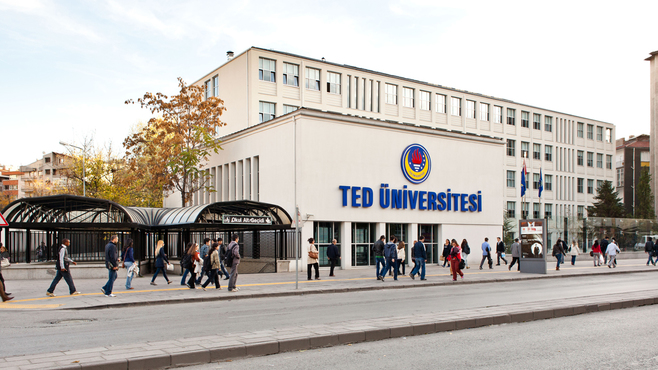

# Introduction

---

In this task, the company will be provided a recommendation if they should contunie with the "New Service" they are working on. The company chooses City A, B and C as pilot cities and trying to see if it is a good idea to implement the new service or not. A customer can choose to use new service or not for each order. The related feature is order_uses_new_service; No means order is not placed in new service, Yes means order placed in new service. The notebook will indicate analysis of the data while building a suggestion and recommendation to the company.

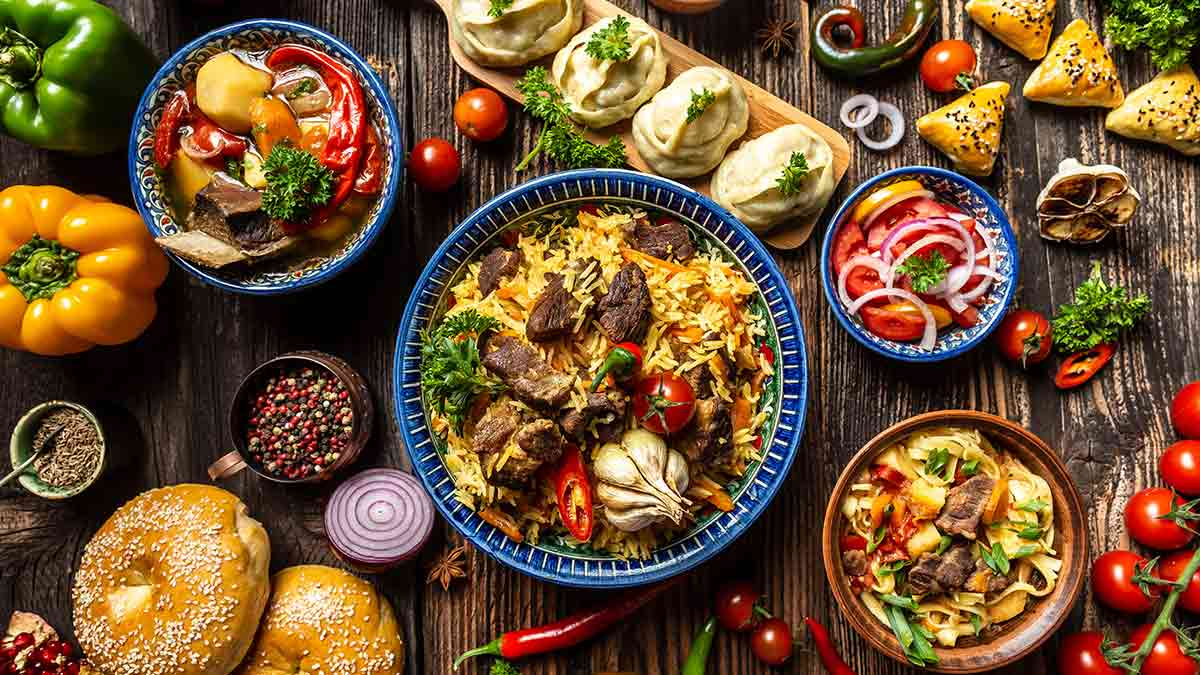

# Quetion?

---



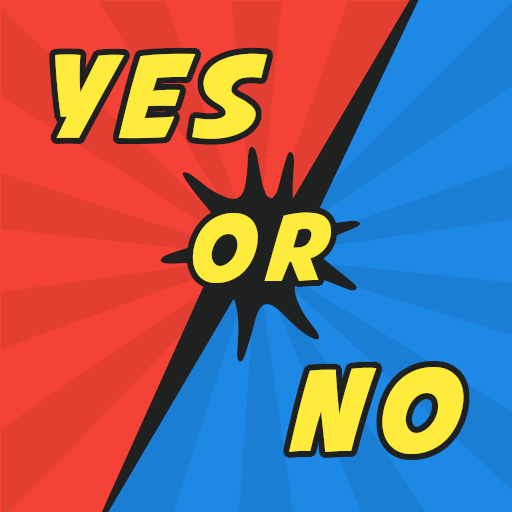

# Libraries

---

In [ ]:
#Basic modules

import os
from google.colab import drive
import sys
import re
import random
import pickle
import builtins
import datetime
import calendar
import time
import html
import statistics
import math
import timeit
import tkinter
import locale
import webbrowser
import collections
import pandas_datareader 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#libraries
import numpy as np
import pandas as pd

from scipy import stats

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import gaussian_kde
import scipy.stats as st
import statsmodels as sm
import statsmodels.stats.weightstats 
from statsmodels.stats.weightstats import ztest
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_1samp



import plotly.express as px
import plotly.graph_objs as go
import scipy
from scipy.stats import linregress
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import expon, skewnorm

import pylab

#Removing features via Select from Model
from sklearn.feature_selection import SelectFromModel

#Scikit-Learn
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification 


from patsy import dmatrices, build_design_matrices
from datetime import datetime, date 

# Data Loading

---

In [ ]:
df = pd.read_excel("/content/datset.xlsx")
df.head()


,city,customer_id,order_date,customer_n_th_order,order_id,restaurant_id,cuisine_type,device_type,order_uses_new_service,customer_segment,...,delivery_distance,delivery_time_min,delivered_on_time,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating
0,CityA,c3daaf9116,2022-02-02,1,31fb964dde4a173,afd357fd,Other,Mobile,No,non-adopter,...,1067,49.0,Yes,8.925,1.99,10.915,0.254695,8.22,4,4
1,CityB,153b7bc1dc,2021-12-27,1,f9d56f014fa8f9e,7094d545,Drinks and Ice-cream,Mobile,No,non-adopter,...,1960,54.0,Yes,14.637,0.00,14.637,0.282162,9.05,5,5
2,CityA,1fb32f6de0,2022-01-04,1,97e1d723908531a,ec0d867f,Other,Mobile,No,non-adopter,...,2180,28.0,Yes,11.475,1.99,13.465,0.291125,4.74,4,5
3,CityA,1fb32f6de0,2022-01-23,2,b421d0efbe35c44,b62bd478,Other,Mobile,No,non-adopter,...,1973,70.0,Yes,42.160,1.99,44.150,0.337033,17.63,5,5
4,CityA,b99530f449,2022-01-20,1,3d17b76c9bdaa96,bd4a8954,Mediterranean,Mobile,No,non-adopter,...,880,60.0,Yes,16.405,1.99,18.395,0.314759,10.05,5,5


# PreProcessing

---

In [ ]:
df.isnull().mean()

city                      0.0000
customer_id               0.0000
order_date                0.0000
customer_n_th_order       0.0000
order_id                  0.0000
restaurant_id             0.0000
cuisine_type              0.0000
device_type               0.0000
order_uses_new_service    0.0000
customer_segment          0.0000
delivery_status           0.0000
delivery_distance         0.0000
delivery_time_min         0.0004
delivered_on_time         0.0000
order_food_price          0.0000
delivery_fee              0.0000
gross_order_value         0.0000
pct_comission             0.0000
delivery_cost             0.0004
food_rating               0.0000
delivery_rating           0.0000
dtype: float64

In [ ]:
copydata=df.copy() # I keep my data as a back up in case only 

In [ ]:
counter = 0
for i in df.columns:
    counter +=1
    print(counter, i)

1 city
2 customer_id
3 order_date
4 customer_n_th_order
5 order_id
6 restaurant_id
7 cuisine_type
8 device_type
9 order_uses_new_service
10 customer_segment
11 delivery_status
12 delivery_distance
13 delivery_time_min
14 delivered_on_time
15 order_food_price
16 delivery_fee
17 gross_order_value
18 pct_comission
19 delivery_cost
20 food_rating
21 delivery_rating


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    5000 non-null   object 
 1   customer_id             5000 non-null   object 
 2   order_date              5000 non-null   object 
 3   customer_n_th_order     5000 non-null   int64  
 4   order_id                5000 non-null   object 
 5   restaurant_id           5000 non-null   object 
 6   cuisine_type            5000 non-null   object 
 7   device_type             5000 non-null   object 
 8   order_uses_new_service  5000 non-null   object 
 9   customer_segment        5000 non-null   object 
 10  delivery_status         5000 non-null   object 
 11  delivery_distance       5000 non-null   int64  
 12  delivery_time_min       4998 non-null   float64
 13  delivered_on_time       5000 non-null   object 
 14  order_food_price        5000 non-null   

In [ ]:
df = df.dropna() #let's delete blank rows

In [ ]:
df.describe()

,customer_n_th_order,delivery_distance,delivery_time_min,order_food_price,delivery_fee,gross_order_value,pct_comission,delivery_cost,food_rating,delivery_rating
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,2.030812,2162.054622,48.070828,21.235165,2.050320,23.285485,0.294512,9.344732,4.050820,3.965986
std,2.743495,1147.968390,20.224609,12.896180,0.843863,12.983639,0.030251,4.576300,1.377591,1.504860
min,1.000000,0.000000,8.000000,8.500000,0.000000,8.500000,0.124378,1.360000,1.000000,1.000000
25%,1.000000,1279.000000,36.000000,12.522625,1.990000,14.491375,0.280535,6.110000,3.000000,3.000000
50%,1.000000,2040.000000,42.000000,18.275000,1.990000,20.265000,0.297136,8.290000,5.000000,5.000000
75%,2.000000,2940.500000,59.000000,26.180000,2.990000,28.255000,0.317385,11.500000,5.000000,5.000000
max,30.000000,12984.000000,119.000000,323.977500,3.900000,325.967500,0.409921,29.970000,5.000000,5.000000


# Calculations

---



In [ ]:
df['income']= df['delivery_fee'] + (df['order_food_price'] * df['pct_comission']) 
#This calculation is given by the company

In [ ]:
df['profit'] = df['income'] - df['delivery_cost']


In [ ]:
total_income = df['income'].sum()
total_income

42171.61514544885

In [ ]:
total_profit = df['profit'].sum()
total_profit

-4533.354854551149

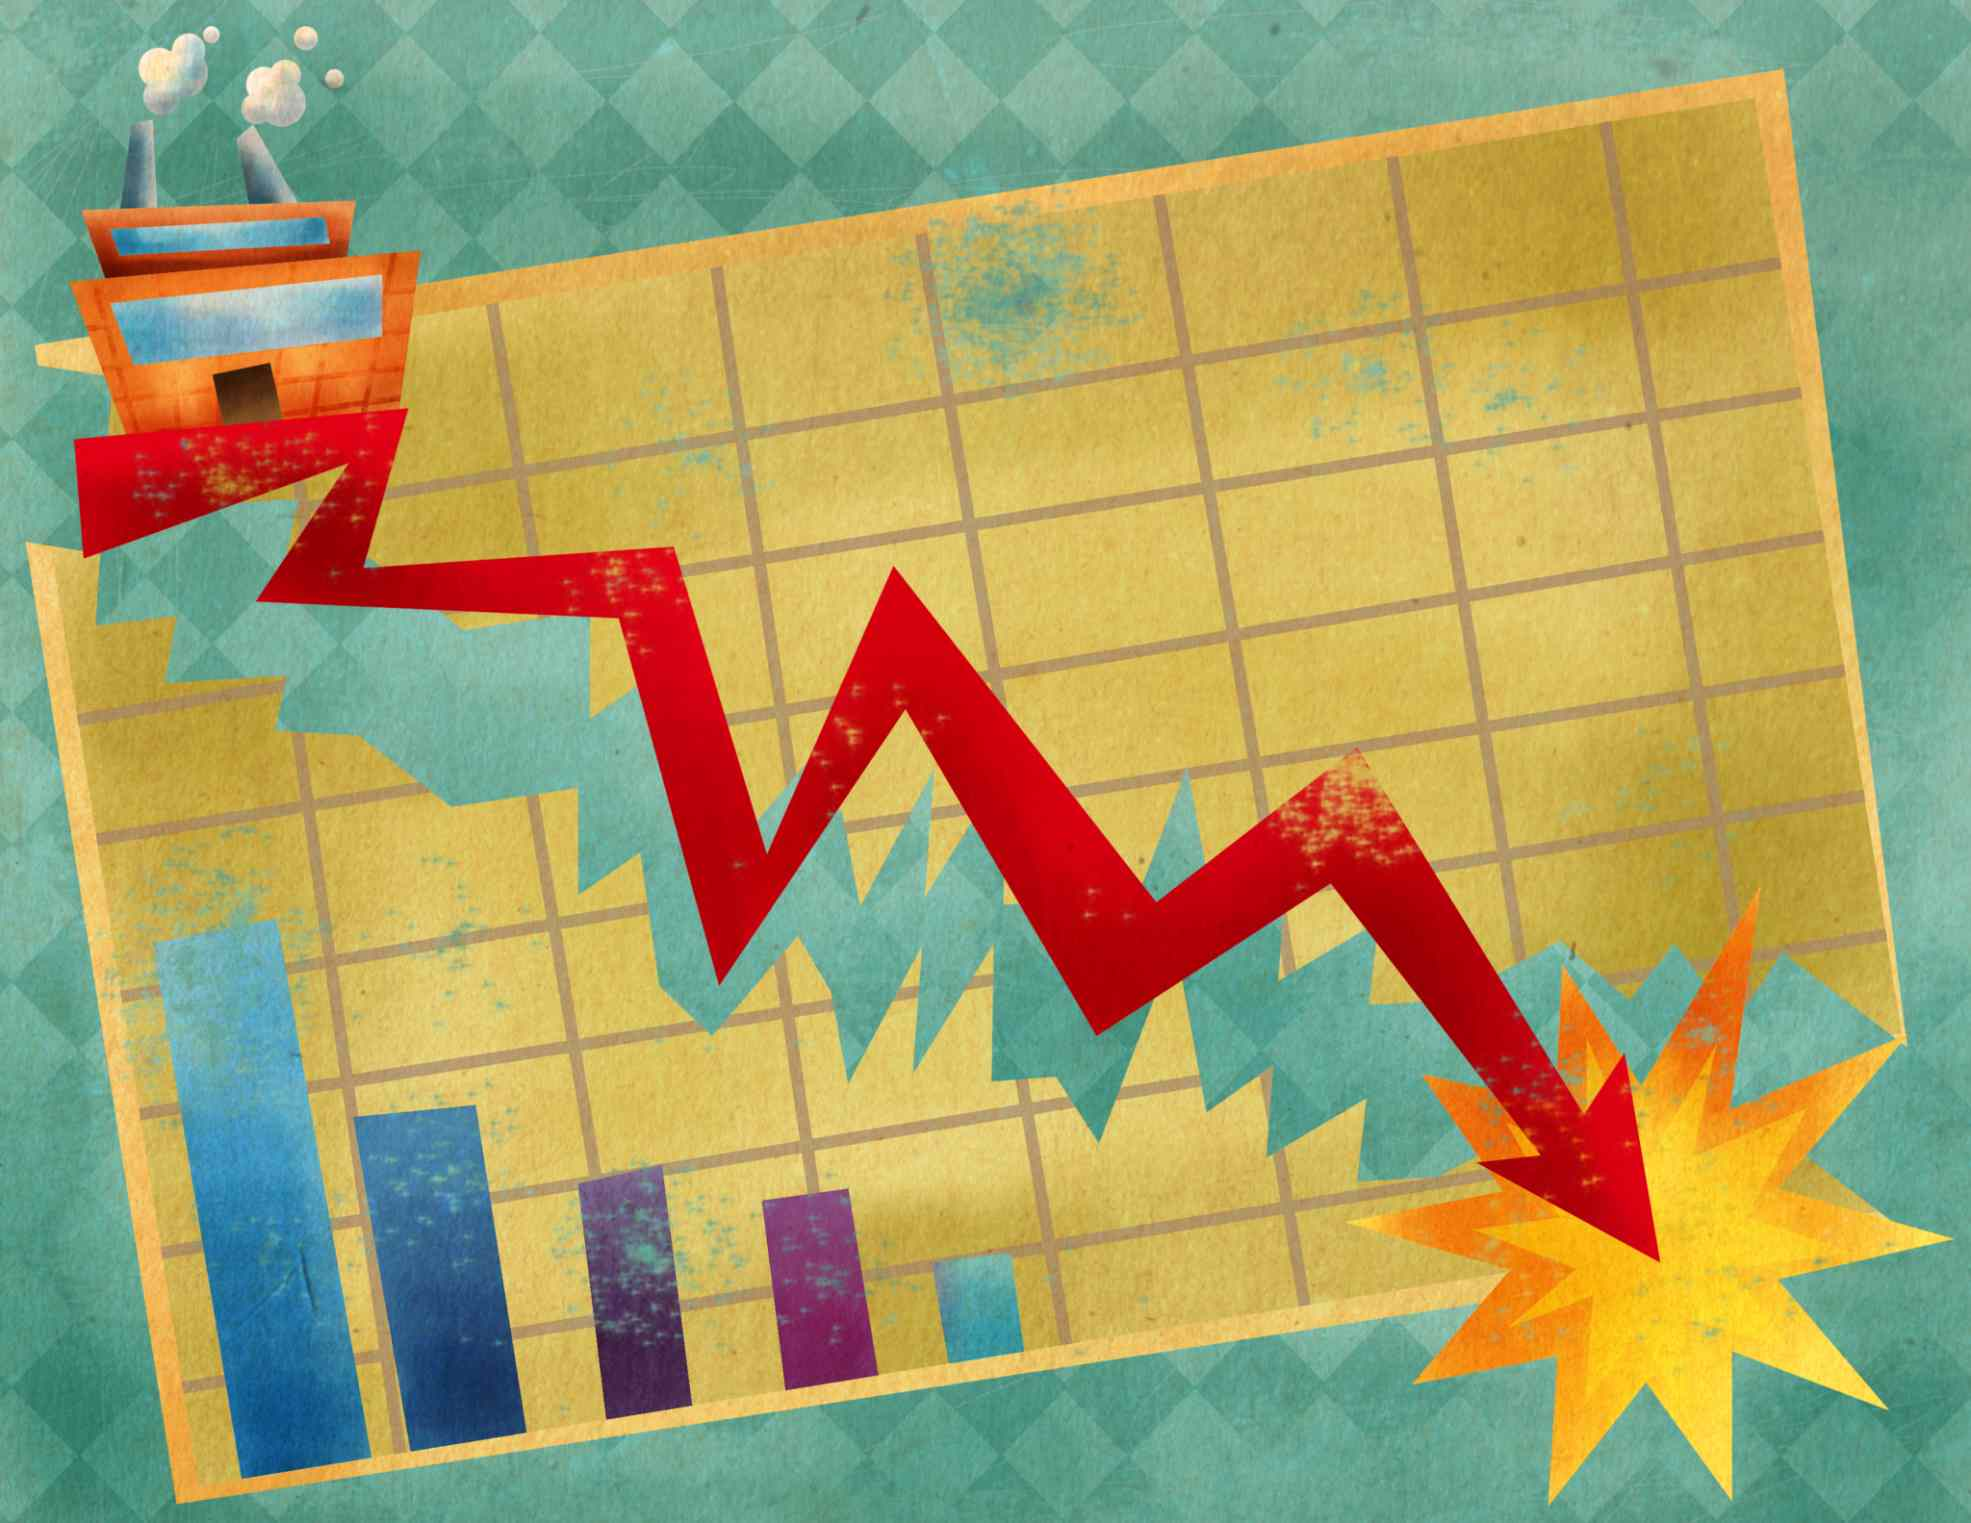

# Quick Analysis

---



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_n_th_order,4998.0,2.030812,2.743495,1.000000,1.000000,1.000000,2.000000,30.000000
delivery_distance,4998.0,2162.054622,1147.968390,0.000000,1279.000000,2040.000000,2940.500000,12984.000000
delivery_time_min,4998.0,48.070828,20.224609,8.000000,36.000000,42.000000,59.000000,119.000000
order_food_price,4998.0,21.235165,12.896180,8.500000,12.522625,18.275000,26.180000,323.977500
delivery_fee,4998.0,2.050320,0.843863,0.000000,1.990000,1.990000,2.990000,3.900000
gross_order_value,4998.0,23.285485,12.983639,8.500000,14.491375,20.265000,28.255000,325.967500
pct_comission,4998.0,0.294512,0.030251,0.124378,0.280535,0.297136,0.317385,0.409921
delivery_cost,4998.0,9.344732,4.576300,1.360000,6.110000,8.290000,11.500000,29.970000
food_rating,4998.0,4.050820,1.377591,1.000000,3.000000,5.000000,5.000000,5.000000
delivery_rating,4998.0,3.965986,1.504860,1.000000,3.000000,5.000000,5.000000,5.000000


In [ ]:
df.groupby('delivery_rating')[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                                   
                   min      mean      skew        max    median       std
delivery_rating                                                          
1                 2.41  8.121277  1.835632  34.902028  7.241808  4.028834
2                 2.44  8.002625  1.739175  26.767914  7.291067  3.876019
3                 2.60  8.165999  2.223679  31.963376  7.306770  3.880814
4                 2.46  8.407792  1.738088  33.252755  7.498199  4.021841
5                 1.42  8.594097  4.094039  92.911523  7.532315  4.566507

In [ ]:
df.groupby('food_rating')[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                                   
               min      mean      skew        max    median       std
food_rating                                                          
1             2.43  7.608168  1.571543  28.402260  6.920110  3.454158
2             2.46  7.624359  2.081388  31.963376  6.891216  3.573499
3             2.41  7.934591  1.489840  24.622378  7.035060  3.717456
4             2.44  8.541411  7.107254  92.911523  7.580986  5.228575
5             1.42  8.734406  2.401712  53.885724  7.653305  4.410027

In [ ]:
df.groupby('delivery_cost')[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                          
                     min       mean skew        max     median std
delivery_cost                                                     
1.36            2.990000   2.990000  NaN   2.990000   2.990000 NaN
1.46            3.090000   3.090000  NaN   3.090000   3.090000 NaN
1.47            5.873120   5.873120  NaN   5.873120   5.873120 NaN
1.52            6.502227   6.502227  NaN   6.502227   6.502227 NaN
1.80            2.800000   2.800000  NaN   2.800000   2.800000 NaN
...                  ...        ...  ...        ...        ...  ..
29.00          18.673913  18.673913  NaN  18.673913  18.673913 NaN
29.05           3.200000   3.200000  NaN   3.200000   3.200000 NaN
29.67           7.303023   7.303023  NaN   7.303023   7.303023 NaN
29.82           6.744219   6.744219  NaN   6.744219   6.744219 NaN
29.97          11.906639  11.906639  NaN  11.906639  11.906639 NaN

[1572 rows x 6 columns]

In [ ]:
df.groupby('order_uses_new_service')[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                           \
                             min      mean      skew        max    median   
order_uses_new_service                                                      
No                      1.420000  8.184699  3.595118  92.911523  7.183279   
Yes                     4.618109  9.522784  3.178198  53.885724  8.591910   

                                  
                             std  
order_uses_new_service            
No                      4.337245  
Yes                     4.221017

In [ ]:
df.groupby(['device_type','cuisine_type'])[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                  \
                                        min       mean      skew        max   
device_type cuisine_type                                                      
Mobile      Breakfast / Lunch      3.150000   7.124248  1.724450  17.422301   
            Drinks and Ice-cream   2.430000   5.512104  1.372418  20.040000   
            Grill                  4.140000   8.425459  1.789224  23.883220   
            Mediterranean          3.450000   9.287007  3.412926  48.638035   
            Oriental               3.150000   9.085490  1.559508  29.933087   
            Other                  2.500000   8.627461  2.123945  40.389715   
            Other Asian            4.180309   9.365253  1.754089  28.402260   
            Pizza                  4.623735   7.737038  1.247227  15.420973   
            Polish                 9.741842   9.741842       NaN   9.741842   
Website     Breakfast / Lunch      3.720000   8.401697  0.926171  18.475264   
            Drinks and Ice-cream   2.410000   5.550495  1.063098  13.780000   
            Grill                  4.420887   7.793224  0.917947  16.289123   
            Mediterranean          4.222272   8.665430  1.429834  22.735967   
            Oriental               4.070060   9.974043  1.840194  33.252755   
            Other                  1.420000   8.597291  6.507053  92.911523   
            Other Asian            4.177798   8.965292  0.424498  17.636627   
            Polish                13.924731  13.924731       NaN  13.924731   

                                                       
                                     median       std  
device_type cuisine_type                               
Mobile      Breakfast / Lunch      6.567067  2.634234  
            Drinks and Ice-cream   4.920000  2.761339  
            Grill                  6.518369  4.199074  
            Mediterranean          7.994758  5.296564  
            Oriental               8.101920  4.076515  
            Other                  7.604333  4.122792  
            Other Asian            8.400003  3.644492  
            Pizza                  4.973110  4.199566  
            Polish                 9.741842       NaN  
Website     Breakfast / Lunch      7.922466  3.007093  
            Drinks and Ice-cream   5.190000  2.440067  
            Grill                  6.916545  2.773408  
            Mediterranean          8.329564  3.327940  
            Oriental               8.331361  5.752609  
            Other                  7.574999  4.745318  
            Other Asian            8.915758  3.401252  
            Polish                13.924731       NaN

In [ ]:
df.groupby(['city'])[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                                   
         min      mean      skew        max    median       std
city                                                           
CityA   2.35  8.191916  2.339774  53.885724  7.331579  3.950181
CityB   1.42  8.798921  2.175247  48.638035  7.682543  4.537678
CityC   2.44  8.609380  6.028425  92.911523  7.432925  5.026273

In [ ]:
df.groupby(['city','cuisine_type'])[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                  \
                                  min       mean      skew        max   
city  cuisine_type                                                      
CityA Breakfast / Lunch      4.410178   7.213202  2.070699  18.475264   
      Drinks and Ice-cream   2.410000   5.423573  1.451389  20.040000   
      Grill                  4.140000   7.863920  1.518335  19.913204   
      Mediterranean          4.420887   8.782904  2.912415  34.902028   
      Oriental               4.070060   9.267568  1.830032  29.933087   
      Other                  2.350000   8.424226  2.604548  53.885724   
      Other Asian            4.177798   8.858866  1.704626  28.402260   
      Pizza                 11.234174  13.327574       NaN  15.420973   
CityB Breakfast / Lunch      4.382962   8.819432  0.544562  15.919096   
      Drinks and Ice-cream   2.460000   5.792401  0.980740  14.200000   
      Grill                  4.500000   7.726272  0.500747  12.000000   
      Mediterranean          3.450000   8.940663  4.294621  48.638035   
      Oriental               4.170000   9.789223  1.595819  31.963376   
      Other                  1.420000   8.975330  2.029178  40.389715   
      Other Asian            5.211352  10.991987 -0.231586  16.048480   
CityC Breakfast / Lunch      3.150000   6.659841  1.627196  15.570638   
      Drinks and Ice-cream   2.440000   5.369841  1.427779  13.270000   
      Grill                  4.420887   8.929756  1.865785  23.883220   
      Mediterranean          4.140504   9.963255  0.880611  21.291498   
      Oriental               3.150000   9.193156  2.289956  33.252755   
      Other                  2.890000   8.737316  7.713840  92.911523   
      Other Asian            6.000332   8.598262  1.615503  12.877909   
      Pizza                  4.623735   5.500823  2.190778   8.252535   
      Polish                 9.741842  11.833286       NaN  13.924731   

                                                 
                               median       std  
city  cuisine_type                               
CityA Breakfast / Lunch      6.413553  2.924013  
      Drinks and Ice-cream   4.920000  2.628794  
      Grill                  6.437557  3.430276  
      Mediterranean          8.074110  4.279696  
      Oriental               8.088975  4.389240  
      Other                  7.539517  3.932862  
      Other Asian            8.322208  3.567277  
      Pizza                 13.327574  2.960514  
CityB Breakfast / Lunch      8.549828  2.650891  
      Drinks and Ice-cream   5.190000  2.727437  
      Grill                  6.779901  2.632731  
      Mediterranean          8.014650  5.022338  
      Oriental               8.417049  5.193319  
      Other                  7.754610  4.464609  
      Other Asian           11.728366  2.988551  
CityC Breakfast / Lunch      6.295386  2.445538  
      Drinks and Ice-cream   4.710000  2.570967  
      Grill                  7.989419  4.500002  
      Mediterranean          8.847788  4.285760  
      Oriental               8.053537  4.795120  
      Other                  7.590961  5.412880  
      Other Asian            6.916545  3.734487  
      Pizza                  4.914755  1.544509  
      Polish                11.833286  2.957749

In [ ]:
df.groupby(['cuisine_type'])[['profit']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

profit                                           \
                            min      mean      skew        max    median   
cuisine_type                                                               
Breakfast / Lunch    -19.097301 -0.878829 -0.876734  12.365264  0.057240   
Drinks and Ice-cream -25.850000 -2.197450 -1.112302  13.320000 -1.480000   
Grill                -20.622700 -1.384115  0.186537  15.829766 -1.107695   
Mediterranean        -20.177005 -0.443109  0.680831  42.528035 -0.000266   
Oriental             -22.483753  0.039580  0.212387  23.793316 -0.050556   
Other                -23.699667 -0.942449  1.166997  86.801523 -0.734794   
Other Asian          -21.639691 -1.028066 -0.550440  19.232260  0.161892   
Pizza                 -2.096265  1.394181  1.312764   9.310973 -0.520018   
Polish                -2.658158  1.433286       NaN   5.524731  1.433286   

                                
                           std  
cuisine_type                    
Breakfast / Lunch     4.736748  
Drinks and Ice-cream  5.074679  
Grill                 5.847477  
Mediterranean         6.772740  
Oriental              6.379528  
Other                 6.202564  
Other Asian           6.123655  
Pizza                 4.432291  
Polish                5.786176

In [ ]:
df.groupby(['customer_n_th_order'])[['income']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'})

income                                             \
                           min       mean      skew        max     median   
customer_n_th_order                                                         
1                     1.420000   8.526006  3.888628  92.911523   7.567323   
2                     2.460000   8.192988  1.429503  27.076282   7.212933   
3                     2.510000   8.194653  2.336120  36.016429   7.214282   
4                     2.500000   7.936847  1.720930  24.498294   6.931357   
5                     2.460000   8.336551  1.823533  27.672673   7.301913   
6                     2.880000   7.934149  2.202088  23.883220   7.257423   
7                     3.330000   8.387601  1.240259  20.621278   7.598704   
8                     3.840000   8.400438  2.236975  24.798038   7.257429   
9                     4.177798   8.441843  0.783745  16.556069   7.799561   
10                    4.420887   8.690480  3.017541  29.714592   7.450735   
11                    3.120000   8.481582  0.569397  16.802661   7.186517   
12                    4.458273   9.658681  1.956720  27.555950   7.171164   
13                    4.389837   9.305005  2.925354  34.092376   7.093833   
14                    4.565699   6.807648  2.499066  15.564654   5.237305   
15                    5.293359   8.221079  1.714494  16.079550   7.063536   
16                    5.402281   8.111253  0.778637  13.176946   7.156036   
17                    5.293359   8.417719  0.580627  12.420621   7.683540   
18                    5.379512   8.316220 -0.567508  10.738689   8.966436   
19                    5.405801   8.175777  1.626613  14.080589   6.605140   
20                    4.672292   7.679585  1.275607  13.695394   5.911464   
21                    5.293359  10.003540  1.721502  21.111708   7.177155   
22                    5.402281   8.893113  1.631273  17.226027   6.709287   
23                    5.916460   9.892040  1.699232  17.037685   6.721976   
24                    4.960017  11.646356  1.693683  23.565498   6.413553   
25                    7.160000   8.123039       NaN   9.086079   8.123039   
26                    6.088092   8.133523       NaN  10.178954   8.133523   
27                   14.458872  14.458872       NaN  14.458872  14.458872   
28                   13.147582  13.147582       NaN  13.147582  13.147582   
29                   14.187540  14.187540       NaN  14.187540  14.187540   
30                    5.350000   5.350000       NaN   5.350000   5.350000   

                                
                           std  
customer_n_th_order             
1                     4.485272  
2                     3.742597  
3                     4.286753  
4                     3.713297  
5                     4.065395  
6                     3.991240  
7                     3.631261  
8                     4.058951  
9                     3.473542  
10                    5.411204  
11                    4.017206  
12                    6.846676  
13                    7.910377  
14                    3.453897  
15                    3.621764  
16                    3.221614  
17                    2.782953  
18                    2.381584  
19                    3.528108  
20                    3.802447  
21                    6.560639  
22                    4.980992  
23                    6.201403  
24                   10.347833  
25                    1.361943  
26                    2.892677  
27                         NaN  
28                         NaN  
29                         NaN  
30                         NaN

In [ ]:
df.groupby('device_type')[['profit','order_uses_new_service']].agg({'std', 'min', 'max', 'mean', 'median', 'skew'}).T

device_type       Mobile    Website
profit min    -25.850000 -23.699667
       mean    -1.055304  -0.663212
       skew     0.182831   1.603083
       max     42.528035  86.801523
       median  -0.801624  -0.387489
       std      6.027606   6.292461

# Indicative Analysis 

---



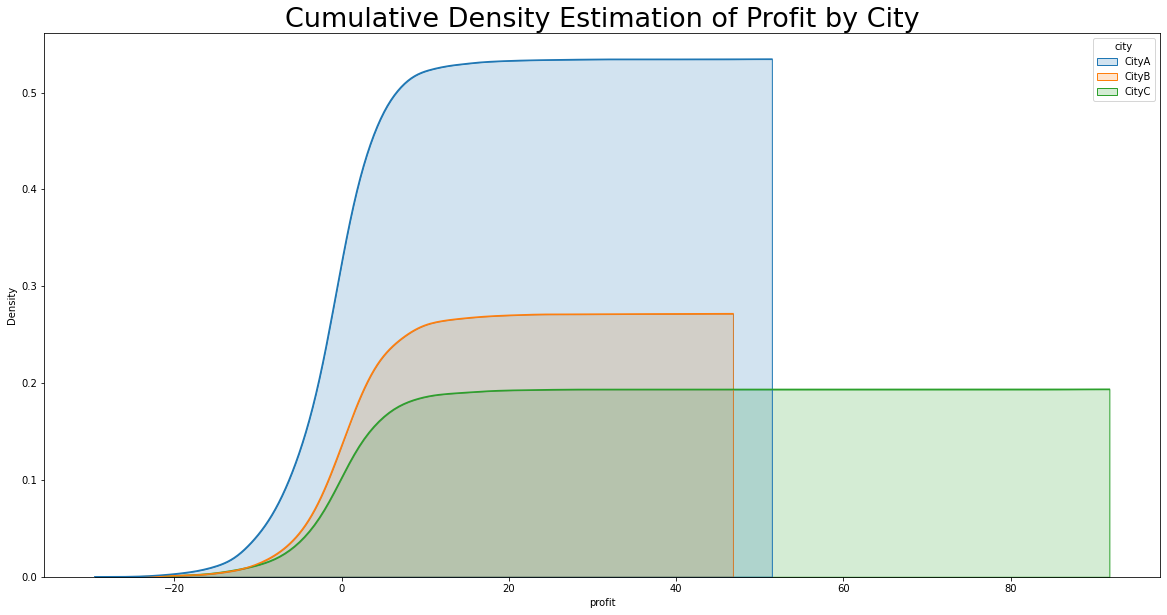

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='profit', hue='city', cumulative=True, shade=False, alpha=1)
sns.kdeplot(data=df, x='profit', hue='city', cumulative=True, shade=True, alpha=0.2)

plt.title('Cumulative Density Estimation of Profit by City', fontsize=27)

plt.show()

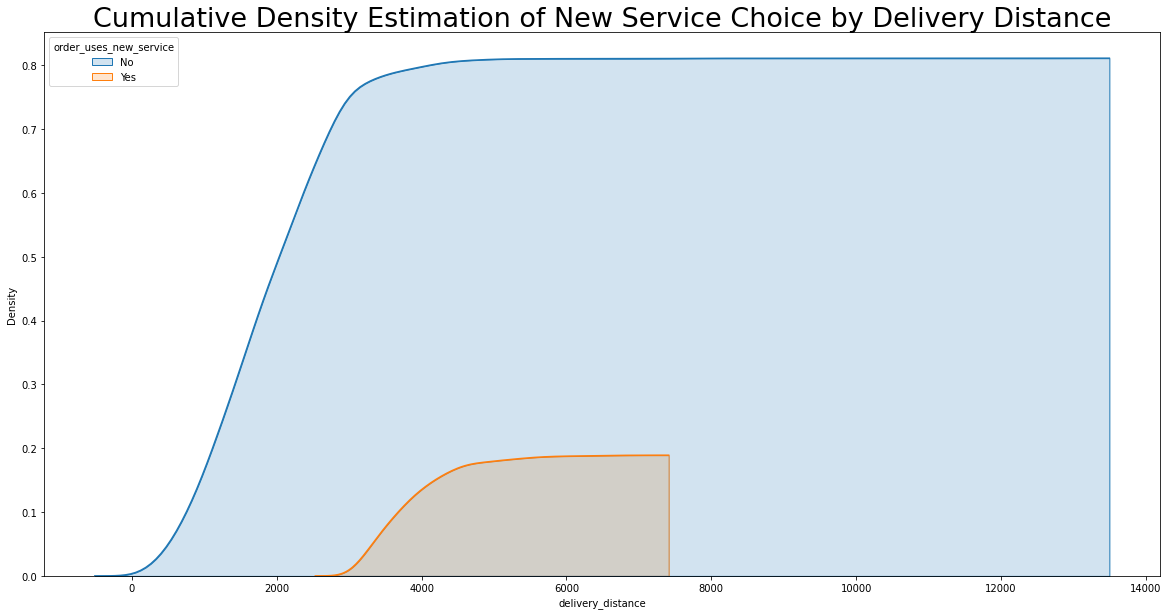

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_distance', hue='order_uses_new_service', cumulative=True, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_distance', hue='order_uses_new_service', cumulative=True, shade=True, alpha=0.2)

plt.title('Cumulative Density Estimation of New Service Choice by Delivery Distance', fontsize=27)

plt.show()

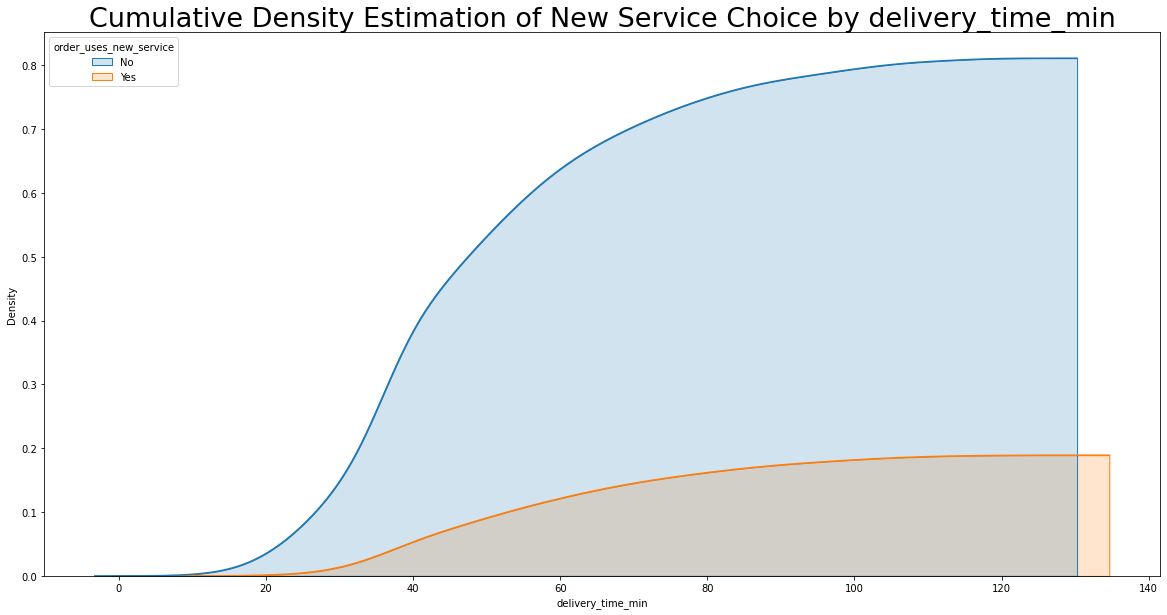

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_time_min', hue='order_uses_new_service', cumulative=True, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_time_min', hue='order_uses_new_service', cumulative=True, shade=True, alpha=0.2)

plt.title('Cumulative Density Estimation of New Service Choice by delivery_time_min', fontsize=27)

plt.show()

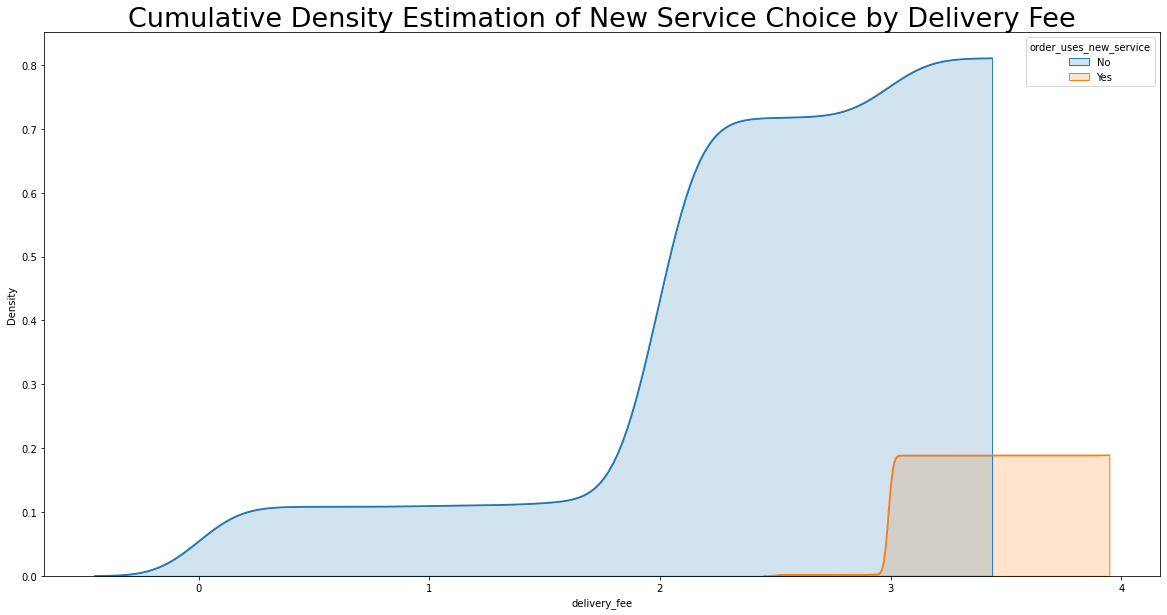

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_fee', hue='order_uses_new_service', cumulative=True, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_fee', hue='order_uses_new_service', cumulative=True, shade=True, alpha=0.2)

plt.title('Cumulative Density Estimation of New Service Choice by Delivery Fee', fontsize=27)

plt.show()

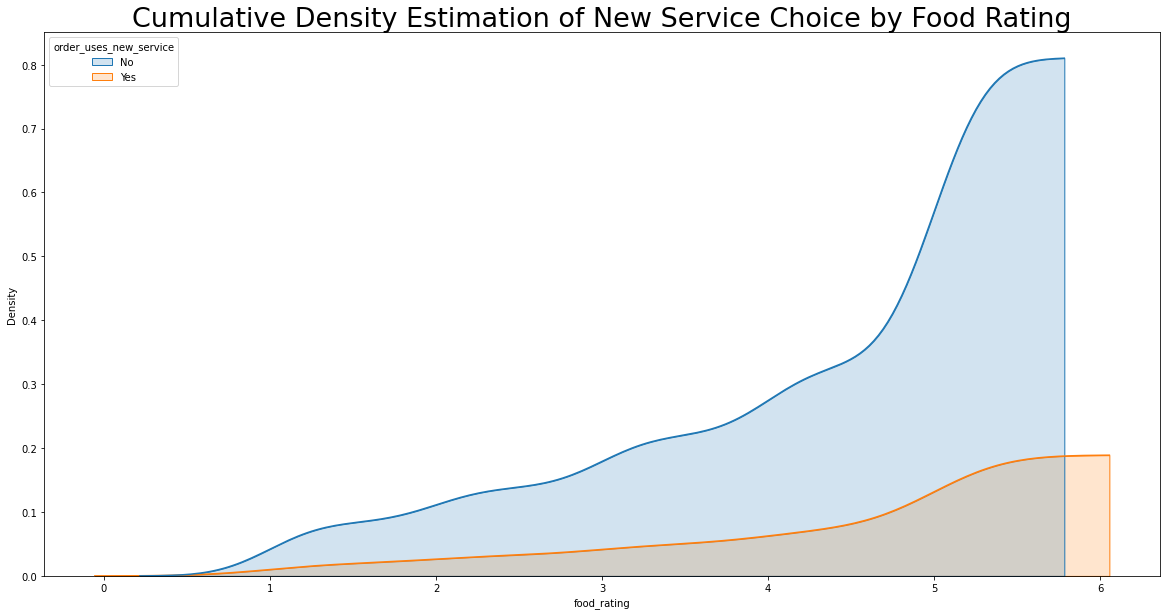

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='food_rating', hue='order_uses_new_service', cumulative=True, shade=False, alpha=1)
sns.kdeplot(data=df, x='food_rating', hue='order_uses_new_service', cumulative=True, shade=True, alpha=0.2)

plt.title('Cumulative Density Estimation of New Service Choice by Food Rating', fontsize=27)

plt.show()

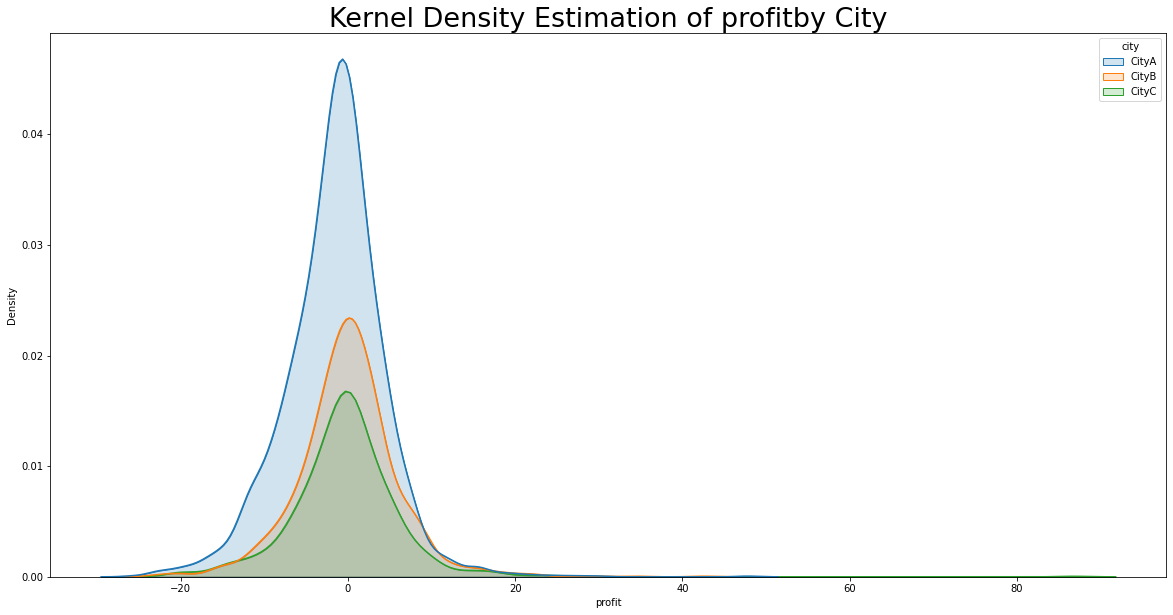

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='profit', hue='city', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='profit', hue='city', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of profitby City', fontsize=27)

plt.show()

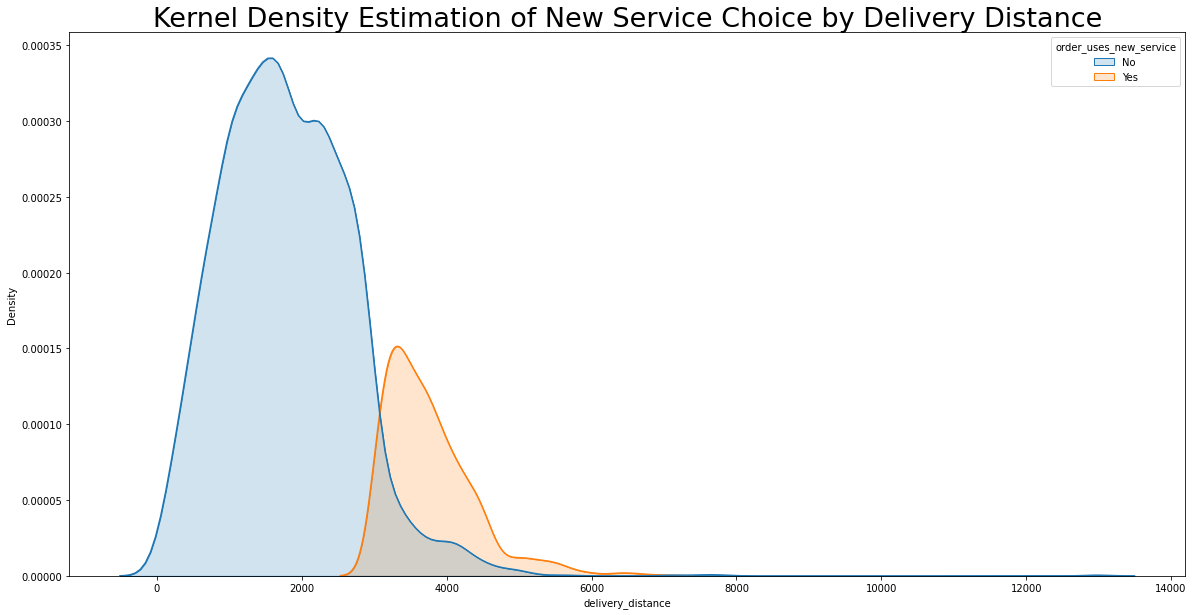

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_distance', hue='order_uses_new_service', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_distance', hue='order_uses_new_service', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of New Service Choice by Delivery Distance', fontsize=27)

plt.show()

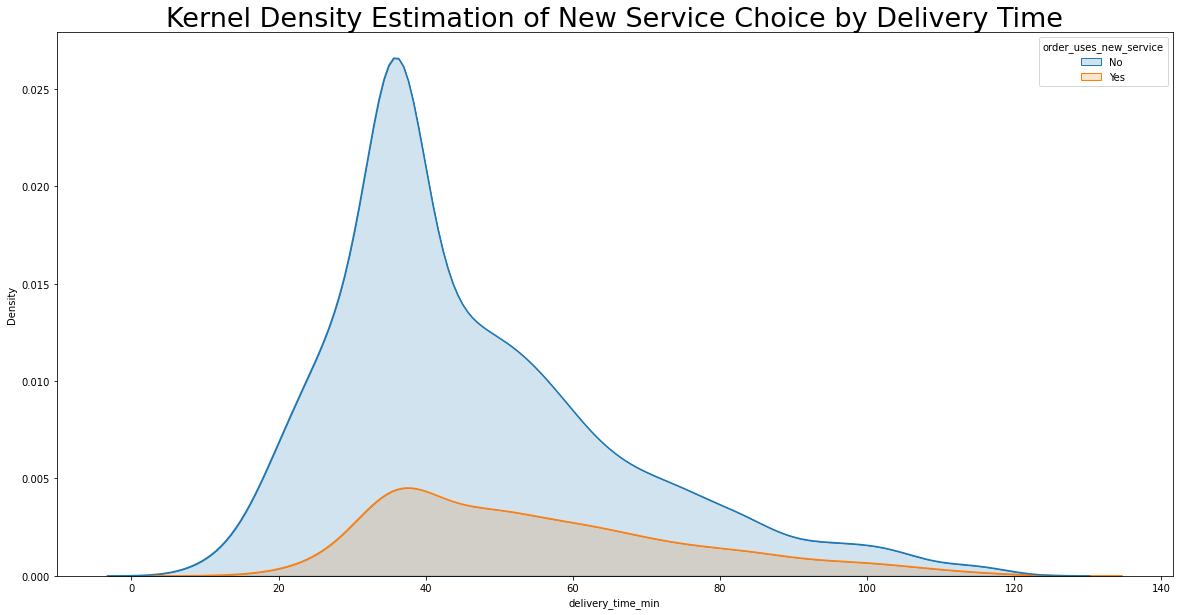

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_time_min', hue='order_uses_new_service', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_time_min', hue='order_uses_new_service', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of New Service Choice by Delivery Time', fontsize=27)

plt.show()

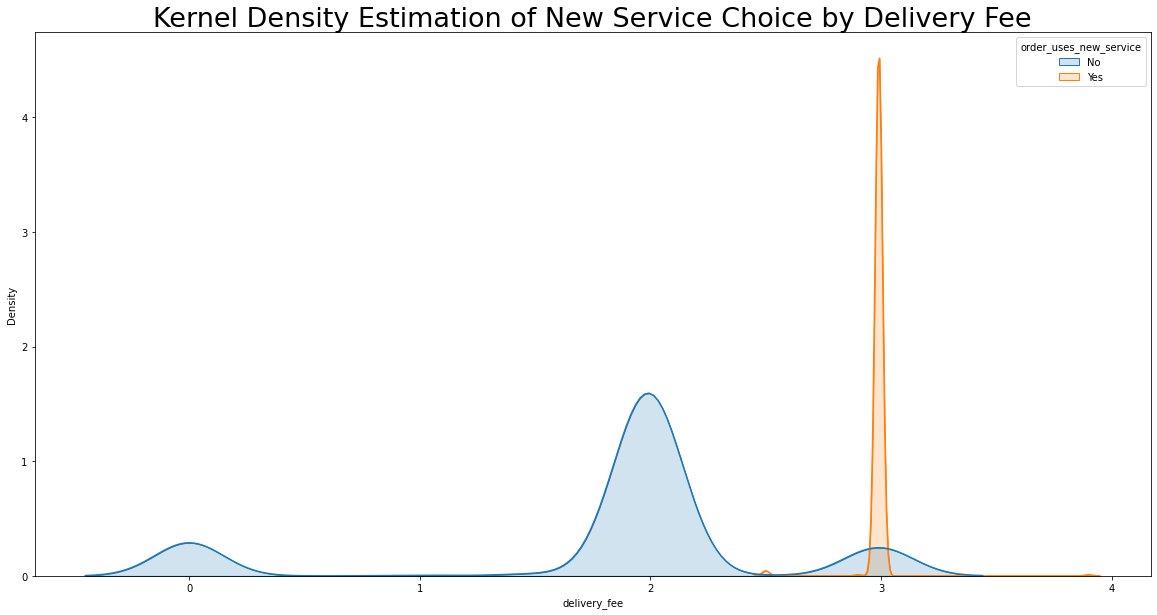

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_fee', hue='order_uses_new_service', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_fee', hue='order_uses_new_service', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of New Service Choice by Delivery Fee', fontsize=27)

plt.show()

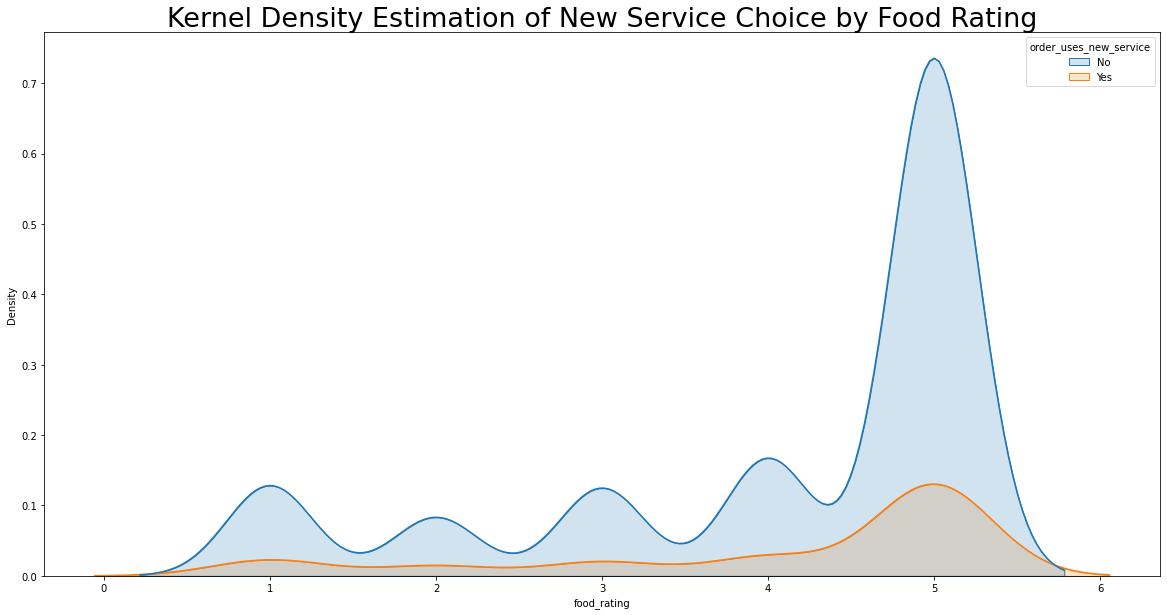

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='food_rating', hue='order_uses_new_service', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='food_rating', hue='order_uses_new_service', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of New Service Choice by Food Rating', fontsize=27)

plt.show()

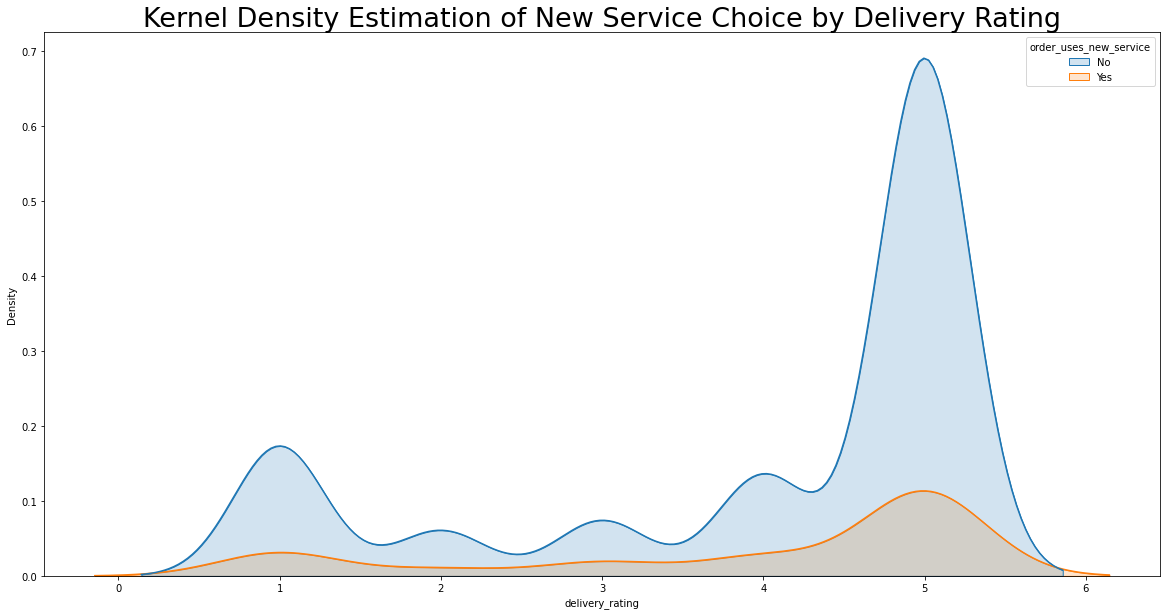

In [ ]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=df, x='delivery_rating', hue='order_uses_new_service', cumulative=False, shade=False, alpha=1)
sns.kdeplot(data=df, x='delivery_rating', hue='order_uses_new_service', cumulative=False, shade=True, alpha=0.2)

plt.title('Kernel Density Estimation of New Service Choice by Delivery Rating', fontsize=27)

plt.show()

# EDA

---


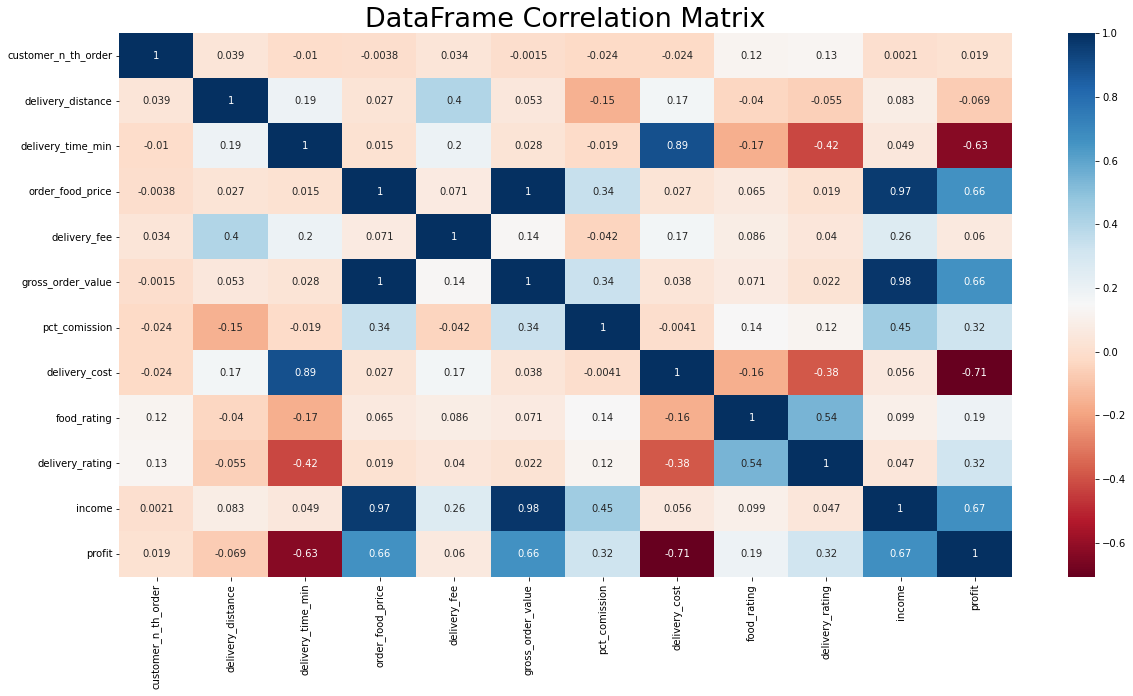

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap= 'RdBu')
plt.title('DataFrame Correlation Matrix', fontsize=27)
plt.show()

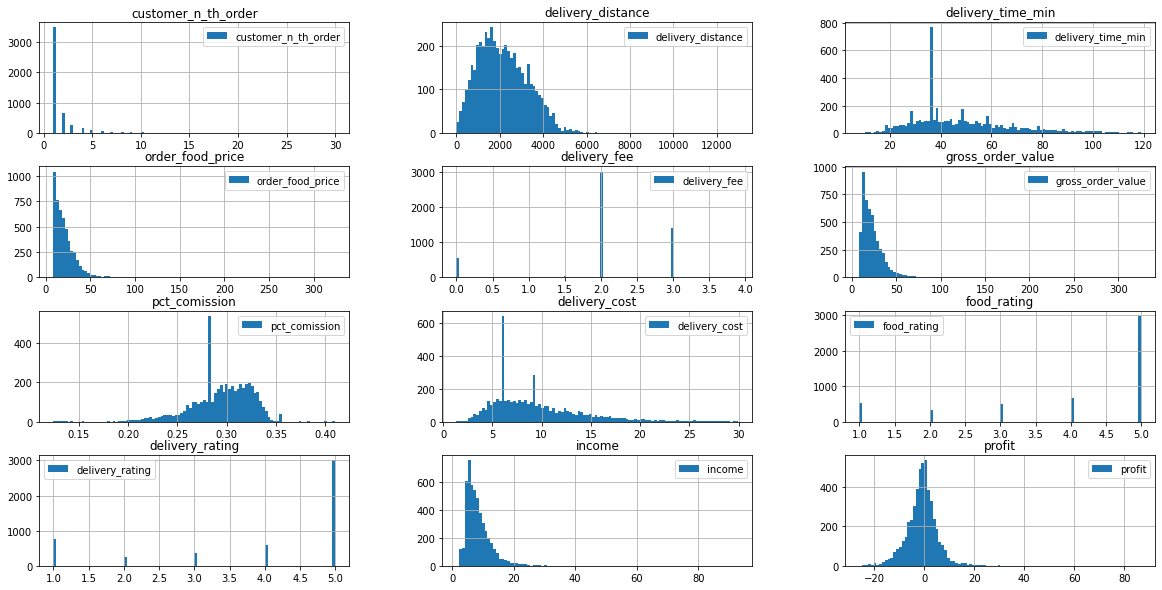

In [ ]:
df.hist(figsize=(20,10), legend=True, bins=100);

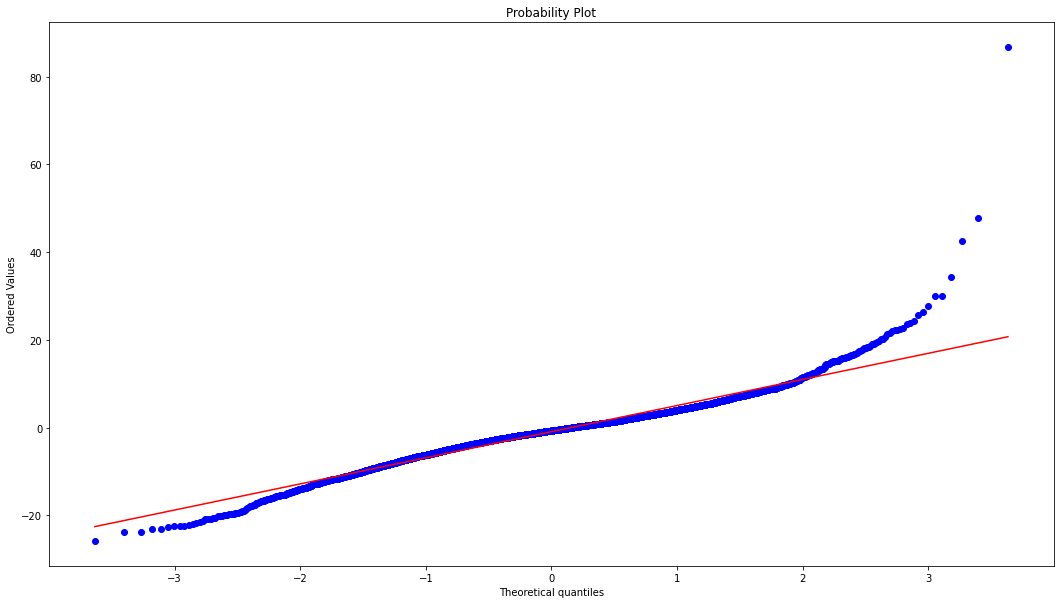

In [ ]:
plt.figure(figsize=(18,10))
plt.title('Q2Q - Quantile to Quantile Normal Distribution', fontsize=27)
qqplot = st.probplot(df['profit'], dist='norm', plot=pylab)

pylab.show()


# Chi-squared test

---


**Variable by Variable:**

*   There is a significant difference between the number of customers who want the new service and their city.
*   There is not a significant difference between the number of customers who want the new service and order_date.

*   There is a significant difference between the number of customers who want the new service and customer_n_th_order.

*   There is a significant difference between the number of customers who want the new service and restaurant_id.

*   There is a significant difference between the number of customers who want the new service and cuisine_type.

*   There is not a significant difference between the number of customers who want the new service and their device type.

*   There is not a significant difference between the number of customers who want the new service and their delivery_distance.

*   There is a significant difference between the number of customers who want the new service and their delivery_time_min.









In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['city'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['city'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(city, 0), service_no_counts.get(city, 0)] for city in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and their city.")
else:
    print("There is not a significant difference between the number of customers who want the new service and their city.")


There is a significant difference between the number of customers who want the new service and their city.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['order_date'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['order_date'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(order_date, 0), service_no_counts.get(order_date, 0)] for order_date in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and order_date.")
else:
    print("There is not a significant difference between the number of customers who want the new service and order_date.")


There is not a significant difference between the number of customers who want the new service and order_date.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['customer_n_th_order'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['customer_n_th_order'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(customer_n_th_order, 0), service_no_counts.get(customer_n_th_order, 0)] for customer_n_th_order in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and customer_n_th_order.")
else:
    print("There is not a significant difference between the number of customers who want the new service and customer_n_th_order.")


There is a significant difference between the number of customers who want the new service and customer_n_th_order.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['restaurant_id'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['restaurant_id'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(restaurant_id, 0), service_no_counts.get(restaurant_id, 0)] for restaurant_id in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and restaurant_id.")
else:
    print("There is not a significant difference between the number of customers who want the new service and restaurant_id.")


There is a significant difference between the number of customers who want the new service and restaurant_id.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['cuisine_type'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['cuisine_type'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(cuisine_type, 0), service_no_counts.get(cuisine_type, 0)] for cuisine_type in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and cuisine_type.")
else:
    print("There is not a significant difference between the number of customers who want the new service and cuisine_type.")


There is a significant difference between the number of customers who want the new service and cuisine_type.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['device_type'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['device_type'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(device_type, 0), service_no_counts.get(device_type, 0)] for device_type in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and their device type.")
else:
    print("There is not a significant difference between the number of customers who want the new service and their device type.")


There is not a significant difference between the number of customers who want the new service and their device type.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['delivery_distance'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['delivery_distance'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(delivery_distance, 0), service_no_counts.get(delivery_distance, 0)] for delivery_distance in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and their delivery_distance.")
else:
    print("There is not a significant difference between the number of customers who want the new service and their delivery_distance.")


There is not a significant difference between the number of customers who want the new service and their delivery_distance.


In [ ]:
from scipy.stats import chi2_contingency

# Extract the counts of each device type for customers who want the new service
service_yes_counts = df[df['order_uses_new_service'] == 'Yes']['delivery_time_min'].value_counts()

# Extract the counts of each device type for customers who do not want the new service
service_no_counts = df[df['order_uses_new_service'] == 'No']['delivery_time_min'].value_counts()

# Create the contingency table
table = [[service_yes_counts.get(delivery_time_min, 0), service_no_counts.get(delivery_time_min, 0)] for delivery_time_min in service_yes_counts.index]

# Call the chi2_contingency function
stat, p, dof, expected = chi2_contingency(table)

# Compare the p-value to the significance level
if p < 0.05:
    print("There is a significant difference between the number of customers who want the new service and their delivery_time_min.")
else:
    print("There is not a significant difference between the number of customers who want the new service and their delivery_time_min.")


There is a significant difference between the number of customers who want the new service and their delivery_time_min.


# Simple Math by Mean

---


*   Offering the new service is likely to decrease profits.
*   Offering the new service is likely to increase food_rating.
*   Offering the new service is likely to decrease delivery_rating.
*   Offering the new service is likely to decrease customer_n_th_order.

In [ ]:
# Next, we will create two separate datasets: one for orders where the customer wants the new service and one for orders where the customer does not want the new service
orders_with_new_service = df[df['order_uses_new_service'] == 'Yes']
orders_without_new_service = df[df['order_uses_new_service'] == 'No']

# Now, we can calculate the average profit for orders where the customer wants the new service and for orders where the customer does not want the new service
average_profit_with_new_service = orders_with_new_service['profit'].mean()
average_profit_without_new_service = orders_without_new_service['profit'].mean()

# Finally, we can use the results to make a prediction about what would happen if the company chose to offer the new service
if average_profit_with_new_service > average_profit_without_new_service:
  print("Offering the new service is likely to increase profits.")
else:
  print("Offering the new service is likely to decrease profits.")

Offering the new service is likely to decrease profits.


In [ ]:
# Next, we will create two separate datasets: one for orders where the customer wants the new service and one for orders where the customer does not want the new service
orders_with_new_service = df[df['order_uses_new_service'] == 'Yes']
orders_without_new_service = df[df['order_uses_new_service'] == 'No']

# Now, we can calculate the average food_rating for orders where the customer wants the new service and for orders where the customer does not want the new service
average_food_rating_with_new_service = orders_with_new_service['food_rating'].mean()
average_food_rating_without_new_service = orders_without_new_service['food_rating'].mean()

# Finally, we can use the results to make a prediction about what would happen if the company chose to offer the new service
if average_food_rating_with_new_service > average_food_rating_without_new_service:
  print("Offering the new service is likely to increase food_rating.")
else:
  print("Offering the new service is likely to decrease food_rating.")

Offering the new service is likely to increase food_rating.


In [ ]:
# Next, we will create two separate datasets: one for orders where the customer wants the new service and one for orders where the customer does not want the new service
orders_with_new_service = df[df['order_uses_new_service'] == 'Yes']
orders_without_new_service = df[df['order_uses_new_service'] == 'No']

# Now, we can calculate the average delivery_rating for orders where the customer wants the new service and for orders where the customer does not want the new service
average_delivery_rating_with_new_service = orders_with_new_service['delivery_rating'].mean()
average_delivery_rating_without_new_service = orders_without_new_service['delivery_rating'].mean()

# Finally, we can use the results to make a prediction about what would happen if the company chose to offer the new service
if average_delivery_rating_with_new_service > average_delivery_rating_without_new_service:
  print("Offering the new service is likely to increase delivery_rating.")
else:
  print("Offering the new service is likely to decrease delivery_rating.")

Offering the new service is likely to decrease delivery_rating.


In [ ]:
# Next, we will create two separate datasets: one for orders where the customer wants the new service and one for orders where the customer does not want the new service
orders_with_new_service = df[df['order_uses_new_service'] == 'Yes']
orders_without_new_service = df[df['order_uses_new_service'] == 'No']

# Now, we can calculate the average customer_n_th_order for orders where the customer wants the new service and for orders where the customer does not want the new service
average_customer_n_th_order_with_new_service = orders_with_new_service['customer_n_th_order'].mean()
average_customer_n_th_order_without_new_service = orders_without_new_service['delivery_rating'].mean()

# Finally, we can use the results to make a prediction about what would happen if the company chose to offer the new service
if average_customer_n_th_order_with_new_service > average_customer_n_th_order_without_new_service:
  print("Offering the new service is likely to increase customer_n_th_order.")
else:
  print("Offering the new service is likely to decrease customer_n_th_order.")

Offering the new service is likely to decrease customer_n_th_order.


# Anything Matters?

---


In [ ]:
# Filter the data for observations from City A
city_a = df[df['city'] == 'CityA']

# Count the number of "Yes" and "No" responses
countsA = city_a['order_uses_new_service'].value_counts()

# Print the counts
print(countsA)


No     2134
Yes     538
Name: order_uses_new_service, dtype: int64


In [ ]:
# Filter the data for observations from City A
city_b = df[df['city'] == 'CityB']

# Count the number of "Yes" and "No" responses
countsB = city_b['order_uses_new_service'].value_counts()

# Print the counts
print(countsB)

No     1024
Yes     334
Name: order_uses_new_service, dtype: int64


In [ ]:
# Filter the data for observations from City A
city_c = df[df['city'] == 'CityC']

# Count the number of "Yes" and "No" responses
countsC = city_c['order_uses_new_service'].value_counts()

# Print the counts
print(countsC)

No     895
Yes     73
Name: order_uses_new_service, dtype: int64


In [ ]:
grouped = df.groupby('city')

# Calculate the percentage of "Yes" responses for each city
percentages = grouped['order_uses_new_service'].value_counts(normalize=True)

# Print the percentage of "Yes" responses for each city
print(percentages)

city   order_uses_new_service
CityA  No                        0.798653
       Yes                       0.201347
CityB  No                        0.754050
       Yes                       0.245950
CityC  No                        0.924587
       Yes                       0.075413
Name: order_uses_new_service, dtype: float64


city   order_uses_new_service
CityA  No                        0.798653
       Yes                       0.201347
CityB  No                        0.754050
       Yes                       0.245950
CityC  No                        0.924587
       Yes                       0.075413
Name: order_uses_new_service, dtype: float64


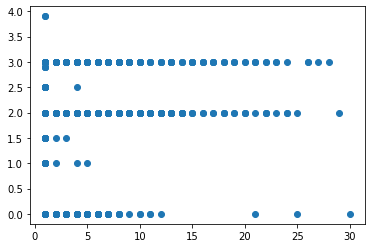

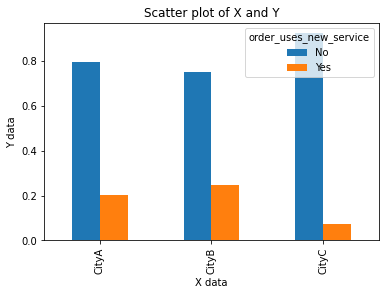

In [ ]:
plt.scatter(x, y)

# Group the data by city
grouped = df.groupby('city')

# Calculate the percentage of "Yes" responses for each city
percentages = grouped['order_uses_new_service'].value_counts(normalize=True)

# Print the percentage of "Yes" responses for each city
print(percentages)

# Unstack the data to create a pivot table
pivot = percentages.unstack()

# Plot the pivot table as a bar chart
pivot.plot(kind='bar')

# Add labels and title
plt.xlabel('X data')
plt.ylabel('Y data')
plt.title('Scatter plot of X and Y')

# Show the plot
plt.show()

In [ ]:
grouped = df.groupby('delivery_time_min')

# Calculate the percentage of "Yes" responses for each city
percentages = grouped['order_uses_new_service'].value_counts(normalize=True)

# Print the percentage of "Yes" responses for each city
print(percentages)

delivery_time_min  order_uses_new_service
8.0                No                        1.000000
9.0                No                        1.000000
10.0               No                        1.000000
11.0               No                        1.000000
12.0               No                        1.000000
                                               ...   
116.0              No                        1.000000
117.0              No                        1.000000
118.0              No                        1.000000
119.0              Yes                       0.666667
                   No                        0.333333
Name: order_uses_new_service, Length: 207, dtype: float64


delivery_time_min  order_uses_new_service
8.0                No                        1.000000
9.0                No                        1.000000
10.0               No                        1.000000
11.0               No                        1.000000
12.0               No                        1.000000
                                               ...   
116.0              No                        1.000000
117.0              No                        1.000000
118.0              No                        1.000000
119.0              Yes                       0.666667
                   No                        0.333333
Name: order_uses_new_service, Length: 207, dtype: float64


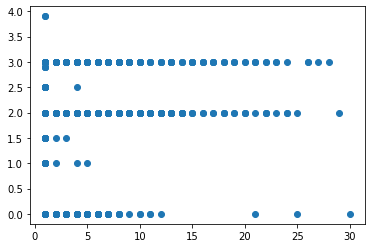

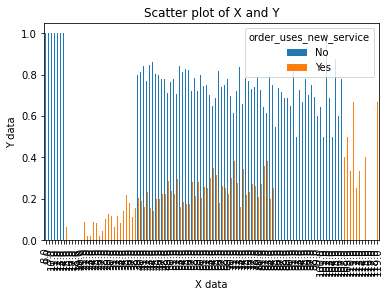

In [ ]:
plt.scatter(x, y)

# Group the data by city
grouped = df.groupby('delivery_time_min')

# Calculate the percentage of "Yes" responses for each city
percentages = grouped['order_uses_new_service'].value_counts(normalize=True)

# Print the percentage of "Yes" responses for each city
print(percentages)

# Unstack the data to create a pivot table
pivot = percentages.unstack()

# Plot the pivot table as a bar chart
pivot.plot(kind='bar')

# Add labels and title
plt.xlabel('X data')
plt.ylabel('Y data')
plt.title('Scatter plot of X and Y')

# Show the plot
plt.show()

# P-Value

---



In [ ]:
df_grouped = df.groupby('order_uses_new_service')

In [ ]:
mean_profit = df_grouped['profit'].mean()

In [ ]:
if mean_profit['Yes'] > mean_profit['No']:
    print("Using the new service is likely to increase the company's profit.")
else:
    print("Using the new service is likely to decrease the company's profit.")

Using the new service is likely to decrease the company's profit.


In [ ]:
from scipy.stats import ttest_ind

# Calculate the t-test statistic and p-value
t_statistic, p_value = ttest_ind(df_grouped.get_group('Yes')['profit'], df_grouped.get_group('No')['profit'])

# Print the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: -1.6566047001679396
P-value: 0.09766221557513828


In [ ]:
from scipy.stats import f_oneway

# Calculate the ANOVA F-statistic and p-value
f_statistic, p_value = f_oneway(df_grouped.get_group('Yes')['profit'], df_grouped.get_group('No')['profit'])

# Print the results
print('F-statistic:', f_statistic)
print('P-value:', p_value)

F-statistic: 2.744339132618512
P-value: 0.09766221557522183


# Regression

---





In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
df['order_uses_new_service'] = df['order_uses_new_service'].map({'Yes': 1, 'No': 0})

In [ ]:
Y = df['profit']
X = df['order_uses_new_service']
X.head()

0    0
1    0
2    0
3    0
4    0
Name: order_uses_new_service, dtype: int64

In [ ]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 profit   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              35.95
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    2.17e-09
Time:                        18:56:20   Log-Likelihood:                         -16191.
No. Observations:                4998   AIC:                                  3.238e+04
Df Residuals:                    4997   BIC:                                  3.239e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
order_uses_new_service    -1.2045      0.201     -5.996      0.000      -1.598      -0.811
==============================================================================
Omnibus:                     1332.243   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26624.713
Skew:                           0.773   Prob(JB):                         0.00
Kurtosis:                      14.201   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the output provided regarding the ordinary least squares (OLS) regression: The dependent variable in the regression is "profit" and the independent variable is "order_uses_new_service".

The R-squared value of 0.007 indicates that the model explains a very small amount of the variance in the dependent variable. The coefficient for the independent variable, -1.2045, suggests that there is a negative relationship between "order_uses_new_service" and "profit". That is, as the value of "order_uses_new_service" increases, the value of "profit" is expected to decrease. This is supported by the t-statistic of -5.996 and the corresponding p-value of 0.000, which indicate that this relationship is statistically significant.



# Answer:

---



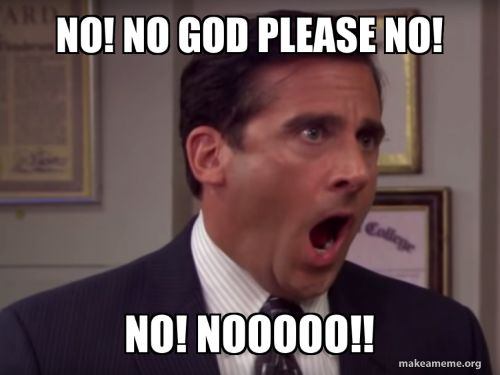